### Load and prepare a dataset for binary classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Breast Cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
df = df.drop(df.columns[-1], axis=1)  # Drops the last column

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Visualization

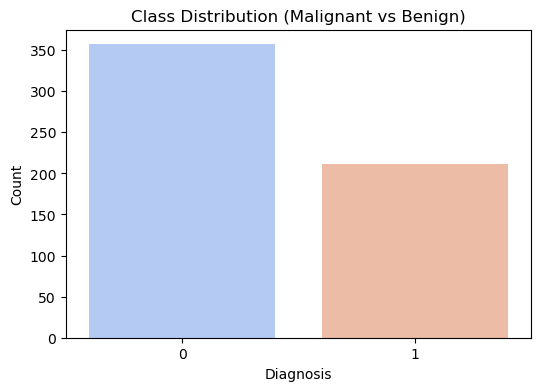

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['diagnosis'], palette='coolwarm')
plt.title("Class Distribution (Malignant vs Benign)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

### Data Preprocessing

In [12]:
# Encode the diagnosis column (Malignant -> 1, Benign -> 0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


In [13]:
# Drop ID column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [14]:
# Selecting only two features for visualization
selected_features = ['radius_mean', 'texture_mean']
X_selected = df[selected_features].values
y_selected = df['diagnosis'].values  # Target variable

In [15]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

In [16]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###  Train SVM with Different Kernels

In [17]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
# Predictions
y_pred_linear = svm_linear.predict(X_test)

In [19]:
# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred_linear)
accuracy_df = pd.DataFrame({'Metric': ['Accuracy'], 'Value': [accuracy]})

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_linear)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Compute Classification Report
report_dict = classification_report(y_test, y_pred_linear, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Display results
print("\n🔹 Accuracy")
display(accuracy_df)

print("\n🔹 Confusion Matrix")
display(cm_df)

print("\n🔹 Classification Report")
display(report_df)



🔹 Accuracy


C:\Users\NISHA KUMARI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NISHA KUMARI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NISHA KUMARI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.377193



🔹 Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,71
Actual 1,0,43



🔹 Classification Report


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,71.000000
1,0.377193,1.000000,0.547771,43.000000
accuracy,0.377193,0.377193,0.377193,0.377193
macro avg,0.188596,0.500000,0.273885,114.000000
weighted avg,0.142275,0.377193,0.206615,114.000000


###  Train SVM with Polynomial Kernel

In [20]:
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train_scaled, y_train)
# Predictions
y_pred_poly = svm_poly.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_poly)
conf_matrix = confusion_matrix(y_test, y_pred_poly)
class_report = classification_report(y_test, y_pred_poly, output_dict=True)  # Convert to dict

# Create DataFrame for Classification Report
df_classification_report = pd.DataFrame(class_report).transpose()

# Create DataFrame for Confusion Matrix
df_confusion_matrix = pd.DataFrame(conf_matrix, 
                                   index=["Actual Negative (0)", "Actual Positive (1)"], 
                                   columns=["Predicted Negative (0)", "Predicted Positive (1)"])

# Print DataFrames
print("\n🔹 SVM with Polynomial Kernel")
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places
print("\nConfusion Matrix:")
display(df_confusion_matrix)  # For Jupyter Notebook, use display() for better output
print("\nClassification Report:")
display(df_classification_report)



🔹 SVM with Polynomial Kernel
Accuracy: 0.8246

Confusion Matrix:


,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),69,2
Actual Positive (1),18,25



Classification Report:


,precision,recall,f1-score,support
0,0.793103,0.971831,0.873418,71.000000
1,0.925926,0.581395,0.714286,43.000000
accuracy,0.824561,0.824561,0.824561,0.824561
macro avg,0.859515,0.776613,0.793852,114.000000
weighted avg,0.843203,0.824561,0.813394,114.000000


### Train SVM with RBF Kernel

In [21]:
svm_rbf = SVC(kernel='rbf', C=1.0, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
# Predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rbf)
conf_matrix = confusion_matrix(y_test, y_pred_rbf)
class_report = classification_report(y_test, y_pred_rbf, output_dict=True)  # Convert to dict

# Create DataFrame for Classification Report
df_classification_report = pd.DataFrame(class_report).transpose()

# Create DataFrame for Confusion Matrix
df_confusion_matrix = pd.DataFrame(conf_matrix, 
                                   index=["Actual Negative (0)", "Actual Positive (1)"], 
                                   columns=["Predicted Negative (0)", "Predicted Positive (1)"])

# Print DataFrames
print("\n🔹 SVM with RBF Kernel")
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places
print("\nConfusion Matrix:")
display(df_confusion_matrix)  # For Jupyter Notebook, use display() for better output
print("\nClassification Report:")
display(df_classification_report)



🔹 SVM with RBF Kernel
Accuracy: 0.9211

Confusion Matrix:


,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),67,4
Actual Positive (1),5,38



Classification Report:


,precision,recall,f1-score,support
0,0.930556,0.943662,0.937063,71.000000
1,0.904762,0.883721,0.894118,43.000000
accuracy,0.921053,0.921053,0.921053,0.921053
macro avg,0.917659,0.913691,0.915590,114.000000
weighted avg,0.920826,0.921053,0.920864,114.000000


### Decision Boundary Visualization

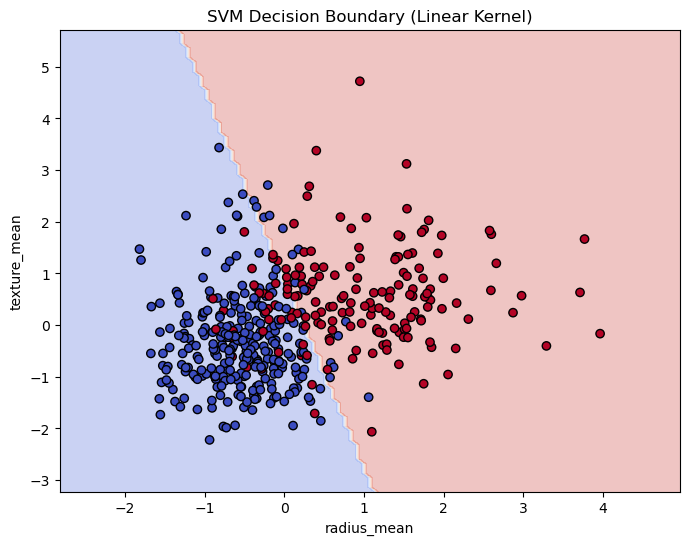

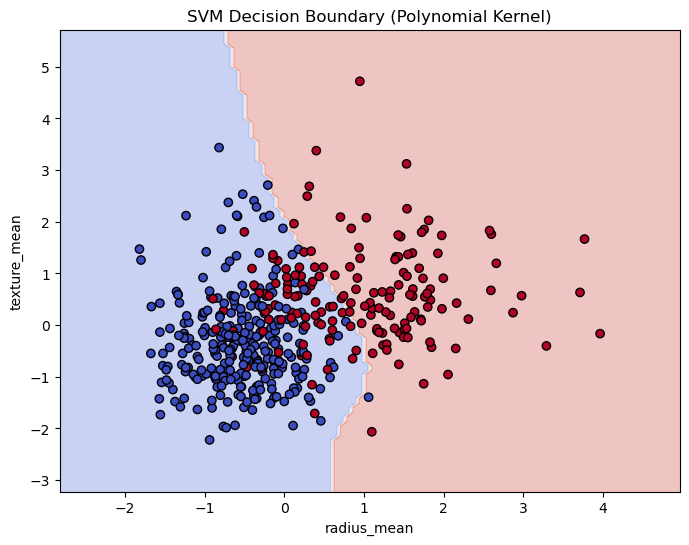

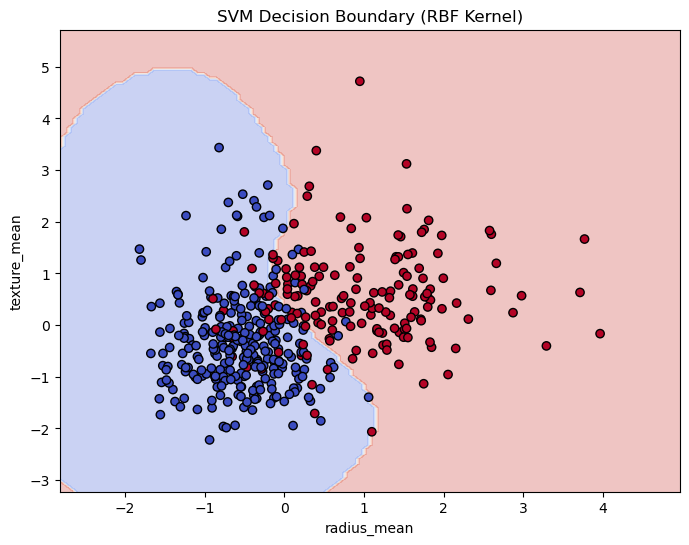

In [22]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict on grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.title(title)
    plt.show()

# Plot decision boundaries for each kernel
plot_decision_boundary(X_train_scaled, y_train, svm_linear, "SVM Decision Boundary (Linear Kernel)")
plot_decision_boundary(X_train_scaled, y_train, svm_poly, "SVM Decision Boundary (Polynomial Kernel)")
plot_decision_boundary(X_train_scaled, y_train, svm_rbf, "SVM Decision Boundary (RBF Kernel)")


### Tune hyperparameters like C and gamma

In [29]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
# Fit the model
grid_search.fit(X_train_scaled, y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
# Output the results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

Best Parameters: {'C': 10, 'gamma': 0.1}
Best Cross-Validation Score: 0.90


### Use cross-validation to evaluate performance

In [30]:
from sklearn.model_selection import cross_val_score
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-Validation Accuracy: 0.90 ± 0.03


###### here 0.90 - 0.03, this indicates that the average accuracy of the best SVM model (with the tuned hyperparameters) is 90%, with a standard deviation of 3%. This means that the model's performance is relatively stable across different subsets of the data.